In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# printing stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
# Data-Preprocessing
# loading the dataset
news_dataset = pd.read_csv('train.csv')

In [7]:
news_dataset.shape

(20800, 5)

In [8]:
# print the first 5 rows of the dataset
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
# counting the number of missing valuesin the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# replacing the null values with empty strings
news_dataset = news_dataset.fillna('')

In [11]:
#merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [12]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [13]:
# separating the data and the label
X = news_dataset.drop(columns=['label'],axis=1)
Y = news_dataset['label']

In [14]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [15]:
# Stemming: It is the process of reducing a word to its root word.(remove suffix and prefix)
port_stem = PorterStemmer()

In [16]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [17]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [18]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [19]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [20]:
print(Y)

[1 0 1 ... 0 1 1]


In [21]:
Y.shape

(20800,)

In [22]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [23]:
X.shape

(20800, 17128)

In [24]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [25]:
# Splitting the dataset to training & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify=Y, random_state=42)

In [26]:
clf_lr = LogisticRegression()

In [27]:
clf_lr.fit(X_train, Y_train)

LogisticRegression()

In [28]:
# accuracy score on the test data using Logistic Regression
predictions_lr = clf_lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(predictions_lr, Y_test)

In [29]:
test_data_accuracy_lr = round(test_data_accuracy_lr, 3)
print('Accuracy score of the test data : ', test_data_accuracy_lr)

Accuracy score of the test data :  0.973


In [30]:
# Making a Predictive System
X_new = X_test[3]

prediction = clf_lr.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [31]:
print(Y_test[3])

1


In [32]:
Y_test

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [33]:
predictions_lr

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [34]:
classes = ['Real','Fake']

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
print(classification_report(Y_test, predictions_lr))
mat=confusion_matrix(Y_test, predictions_lr)
print(confusion_matrix(Y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2597
           1       0.96      0.99      0.97      2603

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200

[[2477  120]
 [  21 2582]]


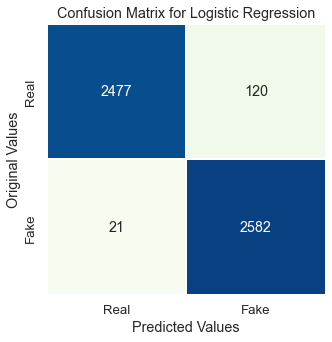

In [37]:
cm_df = pd.DataFrame(mat, index = classes,columns = classes)
plt.figure(figsize = (5,5)) 
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot = True,cbar=False,linewidth=2,fmt='d',cmap="GnBu") 
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Original Values')
plt.xlabel('Predicted Values')
plt.savefig('Cm_lr.png') 
plt.show()

In [38]:
Y_test.shape

(5200,)

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf_dt=DecisionTreeClassifier()
clf_dt=clf_dt.fit(X_train, Y_train)

In [40]:
predictions_dt = clf_dt.predict(X_test)
test_data_accuracy_dt = accuracy_score(predictions_dt, Y_test)
test_data_accuracy_dt = round(test_data_accuracy_dt, 3)
print('Accuracy score of the test data : ', test_data_accuracy_dt)

Accuracy score of the test data :  0.992


In [41]:
print(classification_report(Y_test, predictions_dt))
mat=confusion_matrix(Y_test, predictions_dt)
print(confusion_matrix(Y_test, predictions_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2597
           1       0.99      0.99      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200

[[2571   26]
 [  16 2587]]


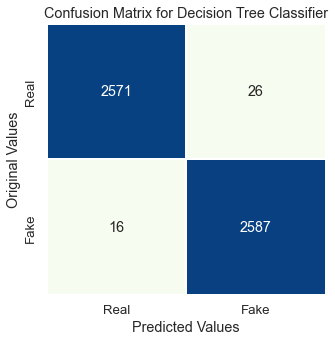

In [42]:
cm_df = pd.DataFrame(mat, index = classes,columns = classes)
plt.figure(figsize = (5,5)) 
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot = True,cbar=False,linewidth=2,fmt='d',cmap="GnBu") 
plt.title('Confusion Matrix for Decision Tree Classifier') 
plt.ylabel('Original Values') 
plt.xlabel('Predicted Values') 
plt.savefig('Cm_dt.png') 
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

In [44]:
clf_rf = clf_rf.fit(X_train,Y_train)

In [45]:
predictions_rf = clf_rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(predictions_rf, Y_test)
test_data_accuracy_rf = round(test_data_accuracy_rf, 3)
print('Accuracy score of the test data : ', test_data_accuracy_rf)

Accuracy score of the test data :  0.992


In [46]:
print(classification_report(Y_test, predictions_rf))
mat=confusion_matrix(Y_test, predictions_rf)
print(confusion_matrix(Y_test, predictions_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2597
           1       0.99      1.00      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200

[[2566   31]
 [  12 2591]]


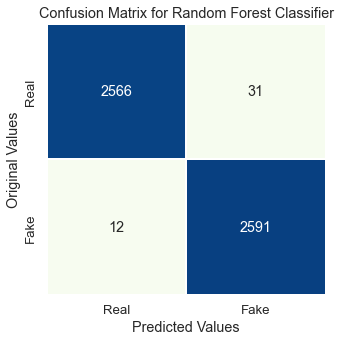

In [47]:
cm_df = pd.DataFrame(mat, index = classes,columns = classes)
plt.figure(figsize = (5,5)) 
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot = True,cbar=False,linewidth=2,fmt='d',cmap="GnBu") 
plt.title('Confusion Matrix for Random Forest Classifier') 
plt.ylabel('Original Values') 
plt.xlabel('Predicted Values') 
plt.savefig('Cm_rf.png') 
plt.show()

In [48]:
from sklearn.svm import SVC
clf_svm = SVC(kernel = 'rbf')

In [49]:
clf_svm.fit(X_train, Y_train)

SVC()

In [50]:
predictions_svm=clf_svm.predict(X_test)
test_data_accuracy_svm = accuracy_score(predictions_svm, Y_test)
test_data_accuracy_svm = round(test_data_accuracy_svm, 3)
print('Accuracy score of the test data : ', test_data_accuracy_svm)

Accuracy score of the test data :  0.986


In [51]:
print(classification_report(Y_test, predictions_svm))
mat=confusion_matrix(Y_test, predictions_svm)
print(confusion_matrix(Y_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2597
           1       0.98      1.00      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200

[[2535   62]
 [  13 2590]]


In [52]:
classes = ['Real','Fake']

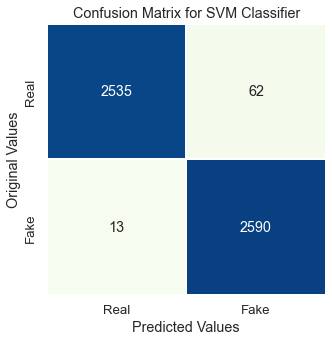

In [53]:
cm_df = pd.DataFrame(mat, index = classes,columns = classes)
plt.figure(figsize = (5,5)) 
sns.set(font_scale=1.2)
sns.heatmap(cm_df, annot = True,cbar=False,linewidth=2,fmt='d',cmap="GnBu") 
plt.title('Confusion Matrix for SVM Classifier') 
plt.ylabel('Original Values') 
plt.xlabel('Predicted Values') 
plt.savefig('Cm_svm.png') 
plt.show()

In [54]:
# creating the dataset
data = {'SVM Classifier':test_data_accuracy_svm, 'Logistic Regression':test_data_accuracy_lr, 'Decision Tree Classifier':test_data_accuracy_dt,
        'Random Forest Classifier':test_data_accuracy_rf}

In [55]:
classifier = list(data.keys())
values = list(data.values())

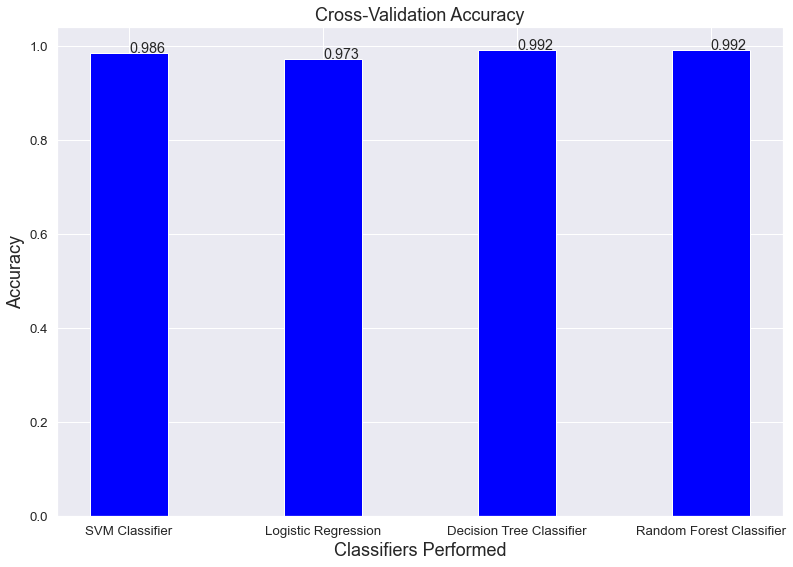

In [56]:
# creating the bar plot
plt.figure(figsize = (13,9))
plt.bar(classifier, values, color ='blue',
        width = 0.4)
for index,value in enumerate(values):
    plt.text(index,value,
             str(value))
plt.xlabel("Classifiers Performed", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.title("Cross-Validation Accuracy", fontsize=18)
plt.savefig('accuracy.png')
plt.show()